## Data Cleaning Lab I

For this lab, you will begin work on your 4th TLAB. The dataset for this lab is in the `../../data/shopping.csv` file. 

The goals for this process include:

* dropping rows with missing data
* dropping columns with overwhelmingly missing data

After you've completed this process, answer the questions underneath `Data Cleaning Lab II` in your own words.

In [1]:
import pandas as pd
import numpy as np

In [7]:
# TODO: load `data/raw/shopping.csv` as a pandas dataframe
df = pd.read_csv("../data/shopping.csv")
df.head()

,Customer ID,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,3475,NaN,Male,Jacket,30.904467,Maine,M,Burnt orange,Fall,4.0,Standard,No,0,Credit Card,NaN
1,3698,21.0,Female,Backpack,31.588259,NaN,L,Turquoise,Winter,2.0,Express,No,1,Credit Card,Monthly
2,2756,31.0,Male,Leggings,24.231704,Nevada,M,Terra cotta,Winter,4.0,Standard,No,0,Credit Card,NaN
3,3340,NaN,Male,Pajamas,33.918834,Nebraska,M,Black,Winter,NaN,Standard,No,2,Credit Card,Bi-Weekly
4,3391,38.0,Male,Sunglasses,36.545487,Oregon,S,Aubergine,Summer,NaN,Standard,No,0,Credit Card,NaN


In [10]:
# TODO: print out the shape of this dataframe for better clarity
# Documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html

df.shape

(3900, 15)

In [11]:
# TODO: display how many null values are in each column of this dataframe
# Documentation: https://datatofish.com/count-nan-pandas-dataframe/

print(df.isna().sum())

Customer ID                  0
Age                        390
Gender                       0
Item Purchased               0
Purchase Amount (USD)        0
Location                   390
Size                         0
Color                        0
Season                       0
Review Rating             2469
Shipping Type                0
Promo Code Used              0
Previous Purchases           0
Payment Method               0
Frequency of Purchases    2340
dtype: int64


In [15]:
# TODO: it looks like there is roughly 65% of data missing "Frequency of Purchases". Drop this column, as it is mostly empty and unneeded for our analysis.
# In addition, also drop "Customer ID" as this column is also unnecessary
# Reassign this dropped dataframe as a new variable
# Documentation: drive.google.com/drive/folders/1pAWY1JqIQw26uhtT272AoDDeq7jtbkm2

df_new = df.drop(columns = ['Frequency of Purchases','Customer ID'])
df_new.head()


,Age,Gender,Item Purchased,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Shipping Type,Promo Code Used,Previous Purchases,Payment Method
0,NaN,Male,Jacket,30.904467,Maine,M,Burnt orange,Fall,4.0,Standard,No,0,Credit Card
1,21.0,Female,Backpack,31.588259,NaN,L,Turquoise,Winter,2.0,Express,No,1,Credit Card
2,31.0,Male,Leggings,24.231704,Nevada,M,Terra cotta,Winter,4.0,Standard,No,0,Credit Card
3,NaN,Male,Pajamas,33.918834,Nebraska,M,Black,Winter,NaN,Standard,No,2,Credit Card
4,38.0,Male,Sunglasses,36.545487,Oregon,S,Aubergine,Summer,NaN,Standard,No,0,Credit Card


In [16]:
# TODO: print out the shape of this dataframe and verify that the shape is "(3900, 13)"

df_new.shape

(3900, 13)

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

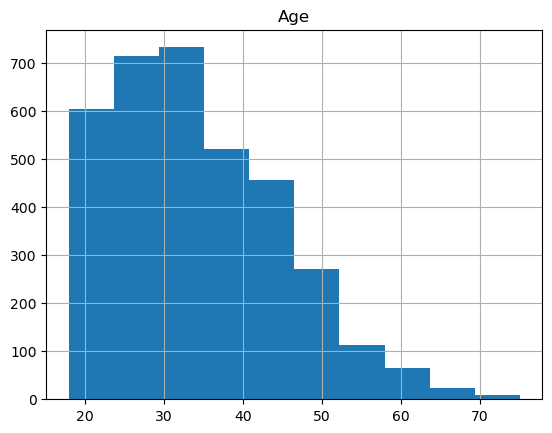

In [23]:
# TODO: Display a histogram using the "Age" column

df_new.hist(column = ["Age"])

In [34]:
# TODO: Display a histogram using the "Purchase Amount (USD)" column

#df_new.hist(column = ["Purchase Amount (USD)"])
#df_new.boxplot(column = ["Purchase Amount (USD)"])
df_new["Purchase Amount (USD)"].mean()

38.708328534989136

3.904961565338924

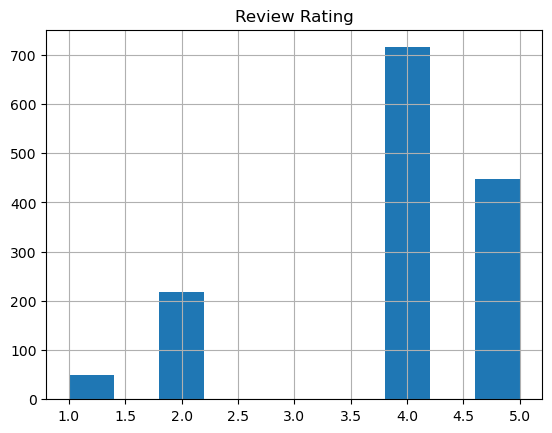

In [38]:
# TODO: Display a histogram using the "Review Rating" column

df_new.hist(column = ["Review Rating"])
#df_new.info()
df_new["Review Rating"].mean()

5.841538461538462

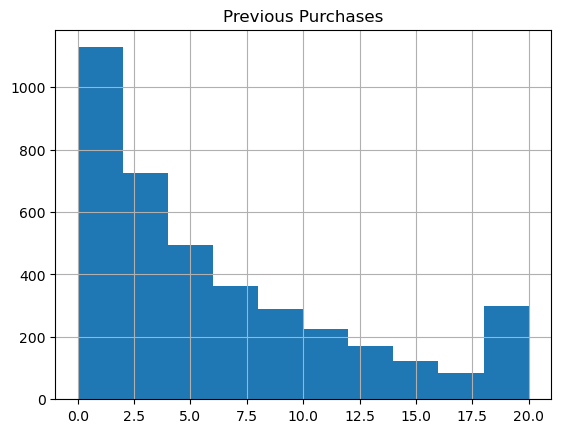

In [39]:
# TODO: Display a histogram using the "Previous Purchases" column

df_new.hist(column = ["Previous Purchases"])
#df_new.boxplot(column = ["Previous Purchases"])
df_new["Previous Purchases"].mean()

## Data Cleaning Lab II

In the next section, answer a few questions regarding your dataset using the visualizations & output you've generated.

### Q1

What kind of distribution do we observe in the "Age" column? Do these outliers represent errors? Why or why not?

In the "Age" column we have a right-skewed distribution. This is due to our data containing outliers present. We can further check using a box plot and observe that there are outliers on the max end of the box plot. These outliers do not represent errors because they are close to the range that most of the data falls within. 

### Q2

What kind of distribution do we observe in the "Purchase Amount (USD)" column? Do these outliers represent errors? Why or why not?

In the "Purchase Amount (USD)" column w observe a normal distribution. We do not observe outliers in this column for our data. 

### Q3

What kind of variable is the "Review Rating" column? Why does this variable-type make sense given the context of a review?

We have discrete variables in the "Review Rating" column. This makes sense because we have distinct values (whole numbers) that are given as reviews. 

### Q4

Using the "Previous Purchases" histogram, what do we notice about this distribution? Where are most values located? Do we notice any patterns?

In the "Previous Purchases" histogram we observe right skewed distribution. Most of the values are located in the left side of the graph. By looking at the boxplot we observe that we dont have outliers in our data. However one of the patterns that we observe is that there are large counts of data in the max and min of our graph. What we can observe is that because we are looking at "Previous Purchases" there could be a lot of new customers without a history of purchases. 

### Q5

Make an assumption on the typical shopper on this dataset. What is the typical shoppers Age, Purchase Amount, Review, and amount of Previous Purchases? Base your assumptions on your histograms.

Based on our histograms the profile for our typical shopper is: 

Age: 25-35 yo 
Avg Purchase Amount: $38.71
Avg Review: 3.9 Stars 
Amount of Previous Purchases: 5.8